In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
TSLA_data = pd.read_csv('TSLA.csv')

In [4]:
# Display first few rows 
TSLA_data.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500
1,1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500
2,2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000
3,3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000
4,4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500


## Data Preprocessing

In [6]:
# Drop the 'Unnamed: 0' column as it is not needed
TSLA_data.drop(columns=['Unnamed: 0'], inplace=True)

# Convert 'Date' column to datetime
TSLA_data['Date'] = pd.to_datetime(TSLA_data['Date'])

# Set 'Date' as the index
TSLA_data.set_index('Date', inplace=True)

## Exploratory Data Analysis

In [7]:
# Summary statistics
TSLA_data.describe()

,Open,High,Low,Close,Volume
count,3534.000000,3534.000000,3534.000000,3534.000000,3.534000e+03
mean,74.997811,76.642865,73.249666,74.985912,9.694511e+07
std,102.281381,104.556354,99.811577,102.217353,7.877581e+07
min,1.076000,1.108667,0.998667,1.053333,1.777500e+06
25%,11.448667,11.753834,11.191166,11.532334,4.749600e+07
50%,17.417334,17.645333,17.064000,17.400333,8.216325e+07
75%,159.177502,161.312500,153.632500,158.180004,1.228650e+08
max,411.470001,414.496674,405.666656,409.970001,9.140820e+08


Stock Price Over Time

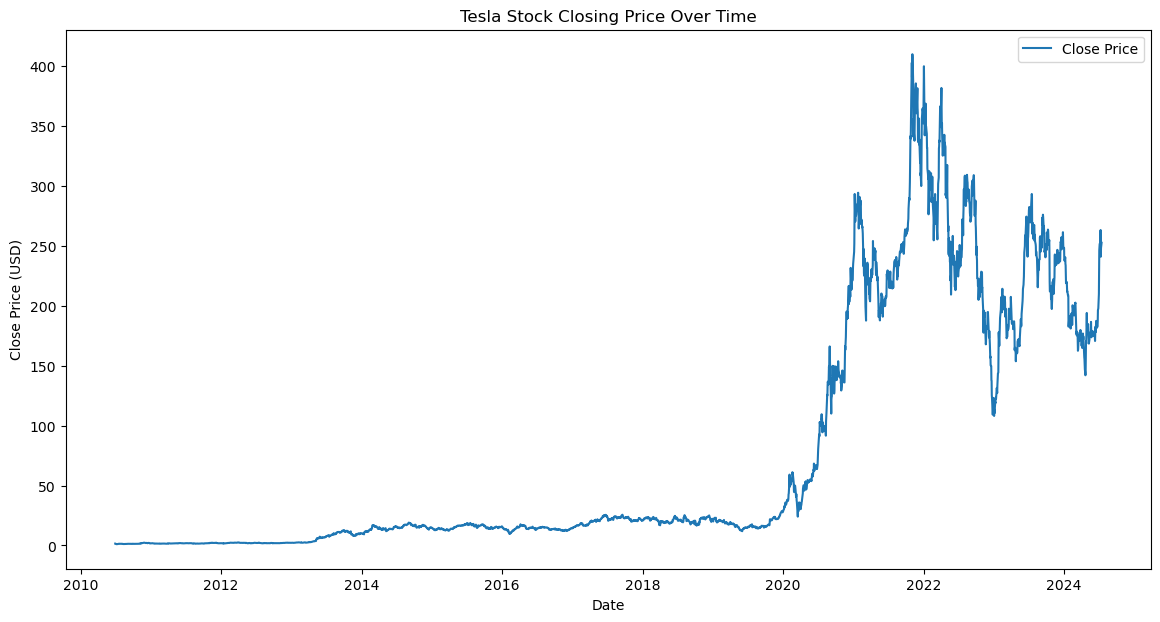

In [9]:
# Plot the closing price over time
plt.figure(figsize=(14,7))
plt.plot(TSLA_data['Close'], label='Close Price')
plt.title('Tesla Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

Volume Traded Over Time

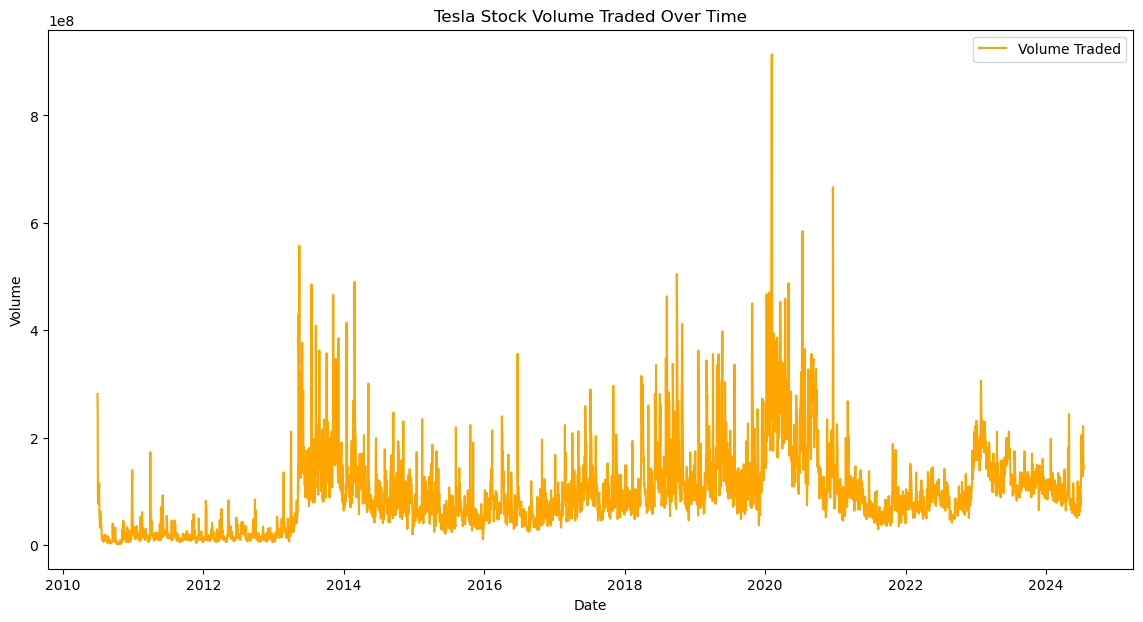

In [11]:
# Plot the volume traded over time
plt.figure(figsize=(14,7))
plt.plot(TSLA_data['Volume'], label='Volume Traded', color='orange')
plt.title('Tesla Stock Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

Correlation Heatmap

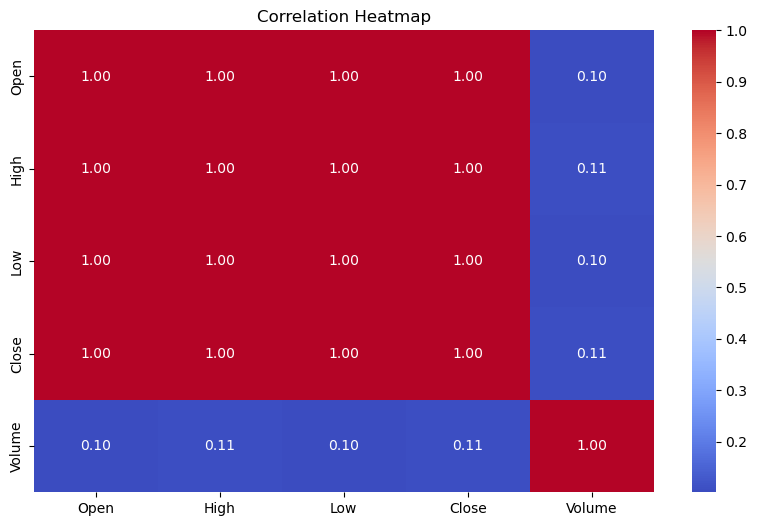

In [12]:
# Correlation heatmap
numeric_df = TSLA_data.select_dtypes(include=[np.number])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Predictive Analysis

Predicting Closing Price

In [13]:
# Prepare the data for prediction
X = TSLA_data[['Open', 'High', 'Low', 'Volume']]
y = TSLA_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate prediction accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(3.1849529086526553, 0.9997003101441536)

In this notebook, we explored Tesla's stock data, visualized trends, and even built a simple linear regression model to predict the closing price. The model's performance can be further improtved by incorporating more advanced techniques or additional features.